In [1]:
!pip install clearml
!pip install ultralytics 
!pip uninstall wandb -y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 26.1 MB/s eta 0:00:00
Found existing installation: wandb 0.16.2
Uninstalling wandb-0.16.2:
  Successfully uninstalled wandb-0.16.2


In [2]:
from kaggle_secrets import UserSecretsClient
 
CLEARML_API_ACCESS_KEY = UserSecretsClient().get_secret('CLEARML_API_ACCESS_KEY')
CLEARML_API_SECRET_KEY = UserSecretsClient().get_secret('CLEARML_API_SECRET_KEY')

In [3]:
%%writefile data_dvb.yaml
train: /kaggle/input/drons-vs-berds-yolo/dataset/train/images
val: /kaggle/input/drons-vs-berds-yolo/dataset/valid/images
test: /kaggle/input/drons-vs-berds-yolo/dataset/test/images
names:  
  0: drone

Writing data_dvb.yaml


In [4]:
import os
os.environ['CLEARML_WEB_HOST'] = 'https://app.clear.ml'
os.environ['CLEARML_API_HOST'] = 'https://api.clear.ml'
os.environ['CLEARML_FILES_HOST'] = 'https://files.clear.ml'
os.environ['CLEARML_API_ACCESS_KEY'] = CLEARML_API_ACCESS_KEY
os.environ['CLEARML_API_SECRET_KEY'] = CLEARML_API_SECRET_KEY

ClearML Task: created new task id=2ba2f4d9e8f04af08b9cdd45beb31b19
2024-03-22 07:22:11,753 - clearml.Repository Detection - WARNING - Failed accessing the jupyter server(s): []
2024-03-22 07:22:11,778 - clearml.Task - INFO - No repository found, storing script code instead


2024-03-22 07:22:14.582141: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 07:22:14.582237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 07:22:14.740145: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ClearML results page: https://app.clear.ml/projects/bda991b03ff34114b2ef93fc1e8d32ba/experiments/2ba2f4d9e8f04af08b9cdd45beb31b19/output/log


100%|██████████| 6.23M/6.23M [00:00<00:00, 151MB/s]


2024-03-22 07:22:34,241 - clearml.model - INFO - Selected model id: 7e130a7c7ded4401b28f307858b8cd67
Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data_dvb.yaml, epochs=15, time=None, patience=100, batch=-1, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

100%|██████████| 755k/755k [00:00<00:00, 38.1MB/s]
2024-03-22 07:22:40,974	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-22 07:22:41,488	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/drons-vs-berds-yolo/dataset/train/labels... 38493 images, 3452 backgrounds, 2 corrupt:  92%|█████████▏| 38493/41632 [02:20<00:09, 330.06it/s]

ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


train: Scanning /kaggle/input/drons-vs-berds-yolo/dataset/train/labels... 41632 images, 3557 backgrounds, 4 corrupt: 100%|██████████| 41632/41632 [02:29<00:00, 279.24it/s]

train: WARNING ⚠️ /kaggle/input/drons-vs-berds-yolo/dataset/train/images/custom_fixed_wing_2_1132.jpg: ignoring corrupt image/label: negative label values [ -0.0034722]
train: WARNING ⚠️ /kaggle/input/drons-vs-berds-yolo/dataset/train/images/parrot_clear_birds_0366.jpg: ignoring corrupt image/label: negative label values [-0.00046296]
train: WARNING ⚠️ /kaggle/input/drons-vs-berds-yolo/dataset/train/images/swarm_dji_phantom_3726.jpg: ignoring corrupt image/label: negative label values [ -0.0026042]
train: WARNING ⚠️ /kaggle/input/drons-vs-berds-yolo/dataset/train/images/two_parrot_disco_1_2380.jpg: ignoring corrupt image/label: negative label values [ -0.0026042]


train: WARNING ⚠️ Cache directory /kaggle/input/drons-vs-berds-yolo/dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/drons-vs-berds-yolo/dataset/valid/labels... 7805 images, 737 backgrounds, 0 corrupt: 100%|██████████| 7805/7805 [00:27<00:00, 287.50it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/drons-vs-berds-yolo/dataset/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000484375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      10.3G      1.976       1.31      1.162         41       1024: 100%|██████████| 1343/1343 [21:09<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:02<00:00,  1.03it/s]


                   all       7805       7068      0.499      0.291      0.284      0.089

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      10.4G      1.871      1.083       1.16         37       1024: 100%|██████████| 1343/1343 [21:51<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:11<00:00,  1.04s/it]

                   all       7805       7068       0.79      0.608      0.672      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      10.3G      1.809      1.019      1.149         50       1024: 100%|██████████| 1343/1343 [21:53<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:07<00:00,  1.01s/it]

                   all       7805       7068      0.731      0.591      0.626      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      10.3G      1.772     0.9764      1.137         37       1024: 100%|██████████| 1343/1343 [22:28<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:17<00:00,  1.09s/it]

                   all       7805       7068      0.741      0.639      0.681      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      10.3G      1.735     0.9345      1.124         49       1024: 100%|██████████| 1343/1343 [22:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:18<00:00,  1.10s/it]

                   all       7805       7068      0.815      0.686      0.723      0.309


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      10.3G       1.72     0.9199      1.171         24       1024: 100%|██████████| 1343/1343 [21:45<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:10<00:00,  1.03s/it]


                   all       7805       7068      0.789      0.683      0.714      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      10.3G      1.684      0.883      1.154         29       1024: 100%|██████████| 1343/1343 [21:57<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:08<00:00,  1.02s/it]

                   all       7805       7068       0.78      0.649      0.714      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      10.3G      1.653     0.8645      1.138         35       1024: 100%|██████████| 1343/1343 [22:02<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:11<00:00,  1.04s/it]

                   all       7805       7068      0.832      0.709      0.746      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      10.3G      1.615     0.8205      1.124         37       1024: 100%|██████████| 1343/1343 [22:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:12<00:00,  1.05s/it]

                   all       7805       7068       0.85      0.715       0.76      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      10.3G      1.583     0.7904       1.11         21       1024: 100%|██████████| 1343/1343 [21:50<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:06<00:00,  1.01s/it]

                   all       7805       7068       0.87      0.715      0.766      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      10.3G      1.547     0.7661      1.094         29       1024: 100%|██████████| 1343/1343 [21:47<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:15<00:00,  1.08s/it]


                   all       7805       7068      0.875      0.728      0.777      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      10.3G      1.507     0.7318      1.081         27       1024: 100%|██████████| 1343/1343 [22:03<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:09<00:00,  1.03s/it]

                   all       7805       7068      0.873      0.732      0.783      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      10.3G      1.475     0.7061      1.066         28       1024: 100%|██████████| 1343/1343 [21:59<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:06<00:00,  1.01s/it]

                   all       7805       7068      0.874      0.726      0.778      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      10.3G      1.449     0.6891      1.058         24       1024: 100%|██████████| 1343/1343 [21:48<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:11<00:00,  1.04s/it]

                   all       7805       7068      0.877      0.732      0.778      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      10.3G      1.418     0.6748      1.047         34       1024: 100%|██████████| 1343/1343 [21:39<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:06<00:00,  1.00s/it]

                   all       7805       7068      0.873      0.733      0.778      0.357



15 epochs completed in 6.031 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [02:05<00:00,  1.01it/s]


                   all       7805       7068      0.878      0.733      0.779      0.359
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train
2024-03-22 13:31:40,027 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/drons_vs_berds/with_test_metrics.2ba2f4d9e8f04af08b9cdd45beb31b19/models/best.pt


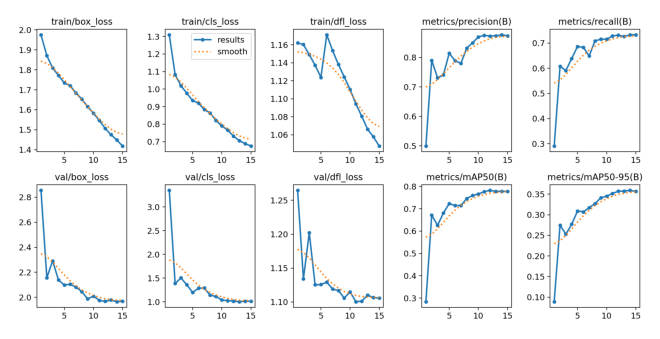

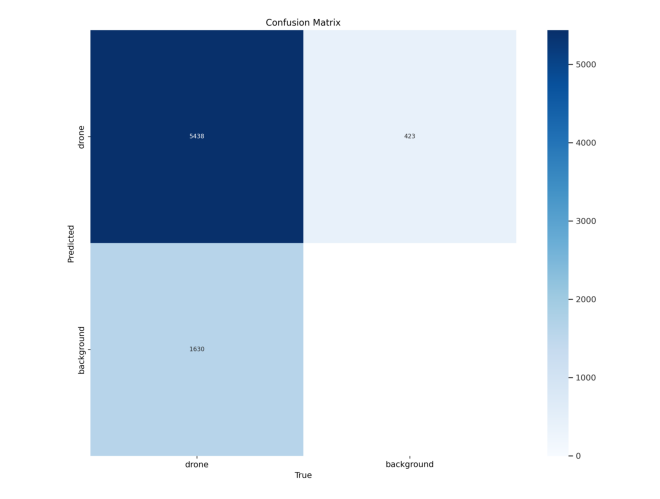

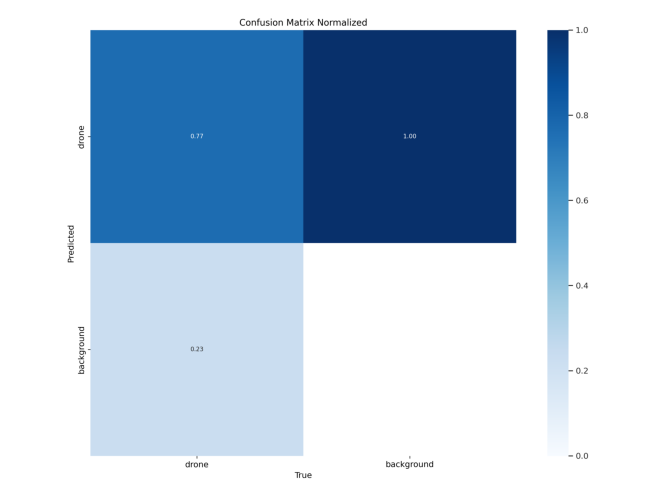

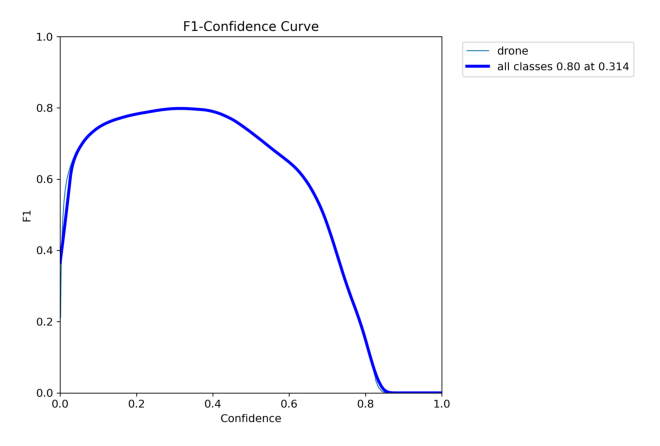

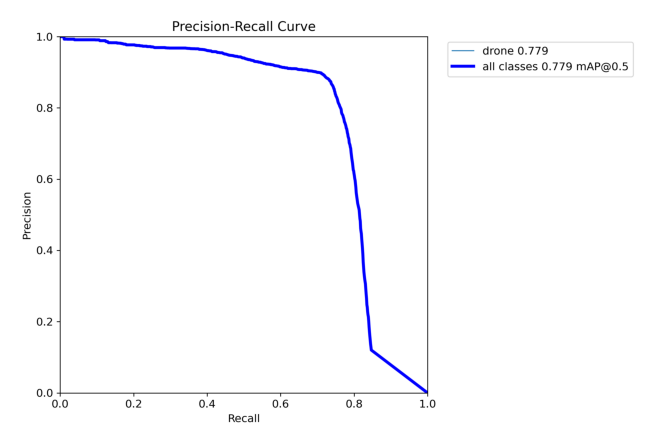

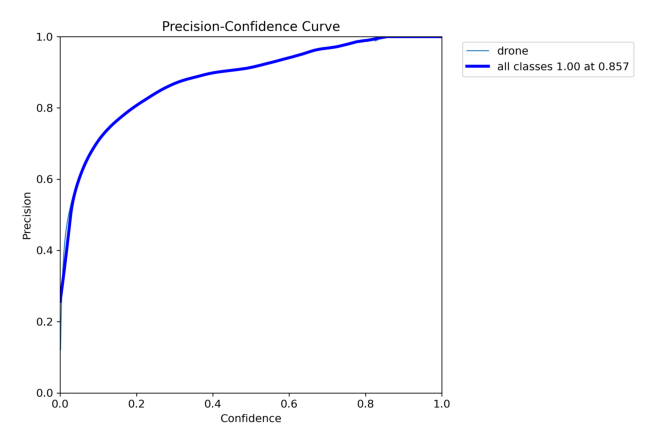

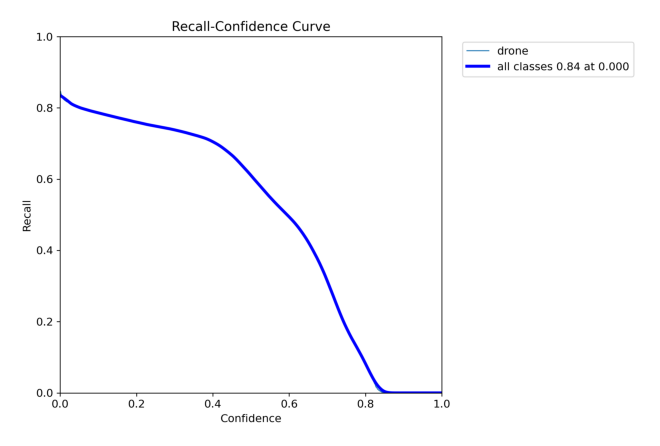

In [5]:
from clearml import Task
from ultralytics import YOLO

# Step 1: Creating a ClearML Task
task = Task.init(
    project_name="drons_vs_berds",
    task_name="with_test_metrics"
)
logger = task.get_logger()

# Step 2: Selecting the YOLOv8 Model
model_variant = "yolov8n"
task.set_parameter("model_variant", model_variant)

# Step 3: Loading the YOLOv8 Model
model = YOLO(f'{model_variant}.pt')

# Step 4: Setting Up Training Arguments
args = dict(data="data_dvb.yaml", 
            epochs=15,
            imgsz=1024,
            half= True,
#             warmup_epochs= 5,
            optimizer= "Adam",
            cos_lr= True,
#             lr0=0.001,
#             lrf= 0.0001,
            batch= -1)
 
task.connect(args)

# Step 5: Initiating Model Training
results = model.train(**args)

In [6]:
model_best = YOLO(f'/kaggle/working/runs/detect/train/weights/best.pt') 

In [7]:
metrics = model_best.val(data="data_dvb.yaml", split="test")

for name, value in metrics.results_dict.items():
    logger.report_single_value(name=f"test_{name}",value=value)

Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/drons-vs-berds-yolo/dataset/test/labels... 3116 images, 258 backgrounds, 0 corrupt: 100%|██████████| 3116/3116 [00:16<00:00, 194.55it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/drons-vs-berds-yolo/dataset/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:51<00:00,  3.75it/s]


                   all       3116       3729      0.588      0.471      0.482       0.17
Speed: 0.3ms preprocess, 3.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
